In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [3]:
df = pd.read_csv('upa_event_ts.csv')
df = df.sort_values(by=['datetime'])

In [4]:
df.head(2)

,datetime,code,day,hour,minute,day_name,datetime.1,count,date,month
0,1535414421259,combinedproducts-search-e-flightresults-filter...,27,20,0,Monday,1535414421259,1,2018-08-27 20:00:21.259,8
1,1535414451815,transfers-checkout-e-credit-card-completed,27,20,0,Monday,1535414451815,2,2018-08-27 20:00:51.815,8


In [5]:
def get_ts(code,df, apply_box_cox = False, lamb = 0.5):
    values = np.float32(df[df.code == code]['count'].values)
    dim = values.shape[0]
    index = np.int64(np.array([x for x in range(1,dim+1)]))
    index = index.reshape(1,dim)
    values = values.reshape(1,dim)
    if (apply_box_cox):
        values = boxcox(values, lamb)
    return (index, values)

In [6]:
def generate_timeseries_csv():
    codes = ['cars-search','cars-checkout','cars-thanks', 'hotels-search','hotels-checkout','hotels-thanks','flights-search','flights-checkout','flights-thanks']
    for code in codes:
        x_ts, y_ts = get_ts(code, df)
        t = pd.Series(data=y_ts.flat, index=x_ts.flat)
        t.to_csv(code + ".csv")

In [133]:
x_ts, y_ts = get_ts('flights-thanks',df, apply_box_cox=True, lamb=0.3)

In [134]:
LEARNING_RATE = 1.0
PERIOD = 1008
PI = np.pi
ALPHA_REG = 0.01
THRESHOLD = 900

In [135]:
x = tf.constant(x_ts,dtype=tf.float32)

y = tf.constant(y_ts,dtype=tf.float32)

multipliers = tf.constant([(x*2*PI)/PERIOD for x in range(THRESHOLD,PERIOD)], dtype=tf.float32)

amplitudes_cos = tf.Variable(tf.random_uniform([1, PERIOD - THRESHOLD], -10, 10, seed=42))

amplitudes_sin = tf.Variable(tf.random_uniform([1, PERIOD - THRESHOLD], -10, 10, seed=42))

bias = tf.Variable(tf.zeros([1]))

sin_part = tf.reduce_sum(tf.sin(tf.transpose(x) * multipliers) * amplitudes_sin, 1)

cos_part = tf.reduce_sum(tf.cos(tf.transpose(x) * multipliers) * amplitudes_cos, 1)

y_pred = sin_part + cos_part + bias

error = y_pred - y

regularizer = ALPHA_REG * tf.nn.l2_loss(amplitudes_cos) + ALPHA_REG * tf.nn.l2_loss(amplitudes_sin)

mse = tf.reduce_mean(tf.square(error) + regularizer, name="mse")

op = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(mse)

In [136]:
n_epochs = 400
init = tf.global_variables_initializer()
sess = tf.Session()
with tf.Session() as sess:
        sess.run(init)
        for epoch in range(n_epochs):
            sess.run(op)
            print("epoch %s, mse = %s " % (epoch, mse.eval()))
        y_p = y_pred.eval()
        frequencies = multipliers.eval()
        amp_cos = amplitudes_cos.eval()
        amp_sin = amplitudes_sin.eval()

epoch 0, mse = 2655.7852 
epoch 1, mse = 1860.4203 
epoch 2, mse = 1254.6218 
epoch 3, mse = 812.4914 
epoch 4, mse = 509.0876 
epoch 5, mse = 318.6276 
epoch 6, mse = 215.10063 
epoch 7, mse = 173.49814 
epoch 8, mse = 171.44742 
epoch 9, mse = 190.70699 
epoch 10, mse = 217.8011 
epoch 11, mse = 243.65068 
epoch 12, mse = 262.74573 
epoch 13, mse = 272.40036 
epoch 14, mse = 272.09164 
epoch 15, mse = 262.7511 
epoch 16, mse = 246.14662 
epoch 17, mse = 224.40024 
epoch 18, mse = 199.63814 
epoch 19, mse = 173.74576 
epoch 20, mse = 148.22435 
epoch 21, mse = 124.16597 
epoch 22, mse = 102.328285 
epoch 23, mse = 83.250496 
epoch 24, mse = 67.32784 
epoch 25, mse = 54.806805 
epoch 26, mse = 45.727165 
epoch 27, mse = 39.853947 
epoch 28, mse = 36.653606 
epoch 29, mse = 35.363888 
epoch 30, mse = 35.15834 
epoch 31, mse = 35.329865 
epoch 32, mse = 35.383266 
epoch 33, mse = 35.008884 
epoch 34, mse = 34.01493 
epoch 35, mse = 32.31061 
epoch 36, mse = 29.936573 
epoch 37, mse = 27.

epoch 317, mse = 0.36819488 
epoch 318, mse = 0.36819482 
epoch 319, mse = 0.36819476 
epoch 320, mse = 0.36819488 
epoch 321, mse = 0.36819482 
epoch 322, mse = 0.36819488 
epoch 323, mse = 0.36819482 
epoch 324, mse = 0.36819482 
epoch 325, mse = 0.36819482 
epoch 326, mse = 0.36819476 
epoch 327, mse = 0.36819476 
epoch 328, mse = 0.3681947 
epoch 329, mse = 0.36819473 
epoch 330, mse = 0.36819482 
epoch 331, mse = 0.36819482 
epoch 332, mse = 0.36819482 
epoch 333, mse = 0.36819485 
epoch 334, mse = 0.36819485 
epoch 335, mse = 0.36819482 
epoch 336, mse = 0.36819476 
epoch 337, mse = 0.36819482 
epoch 338, mse = 0.36819482 
epoch 339, mse = 0.36819482 
epoch 340, mse = 0.36819488 
epoch 341, mse = 0.36819485 
epoch 342, mse = 0.36819476 
epoch 343, mse = 0.36819482 
epoch 344, mse = 0.36819482 
epoch 345, mse = 0.36819482 
epoch 346, mse = 0.36819482 
epoch 347, mse = 0.36819476 
epoch 348, mse = 0.36819476 
epoch 349, mse = 0.36819473 
epoch 350, mse = 0.36819482 
epoch 351, mse 

/Users/claudio.gauna/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/Users/claudio.gauna/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


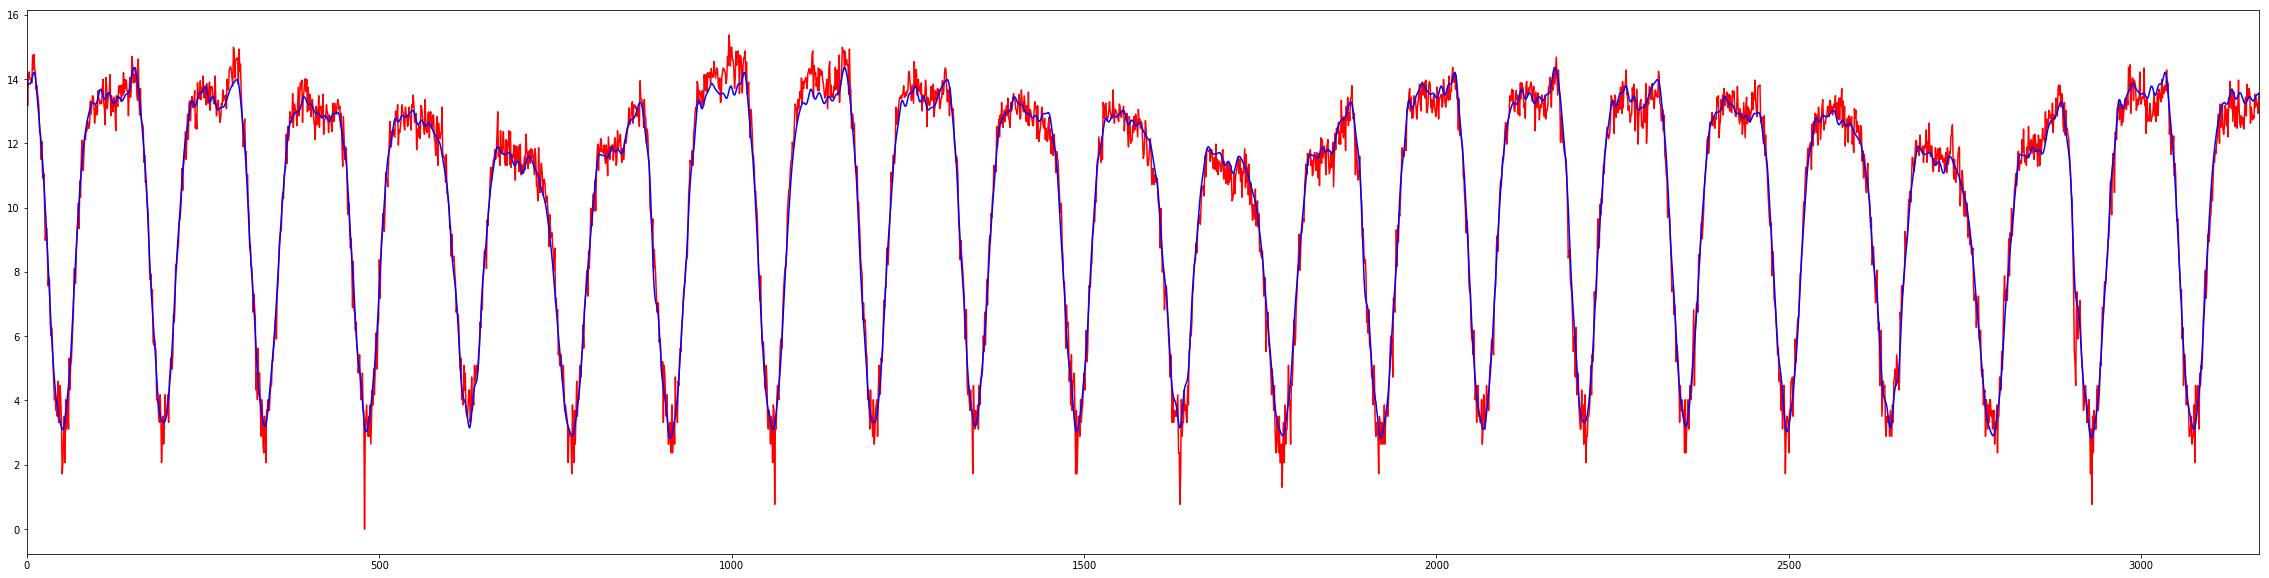

In [137]:
plt.figure(figsize=(40,10))
sbn.tsplot(y_ts, color="red")
sbn.tsplot(y_p, color="blue")

In [138]:
noise = y_ts - y_p

/Users/claudio.gauna/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


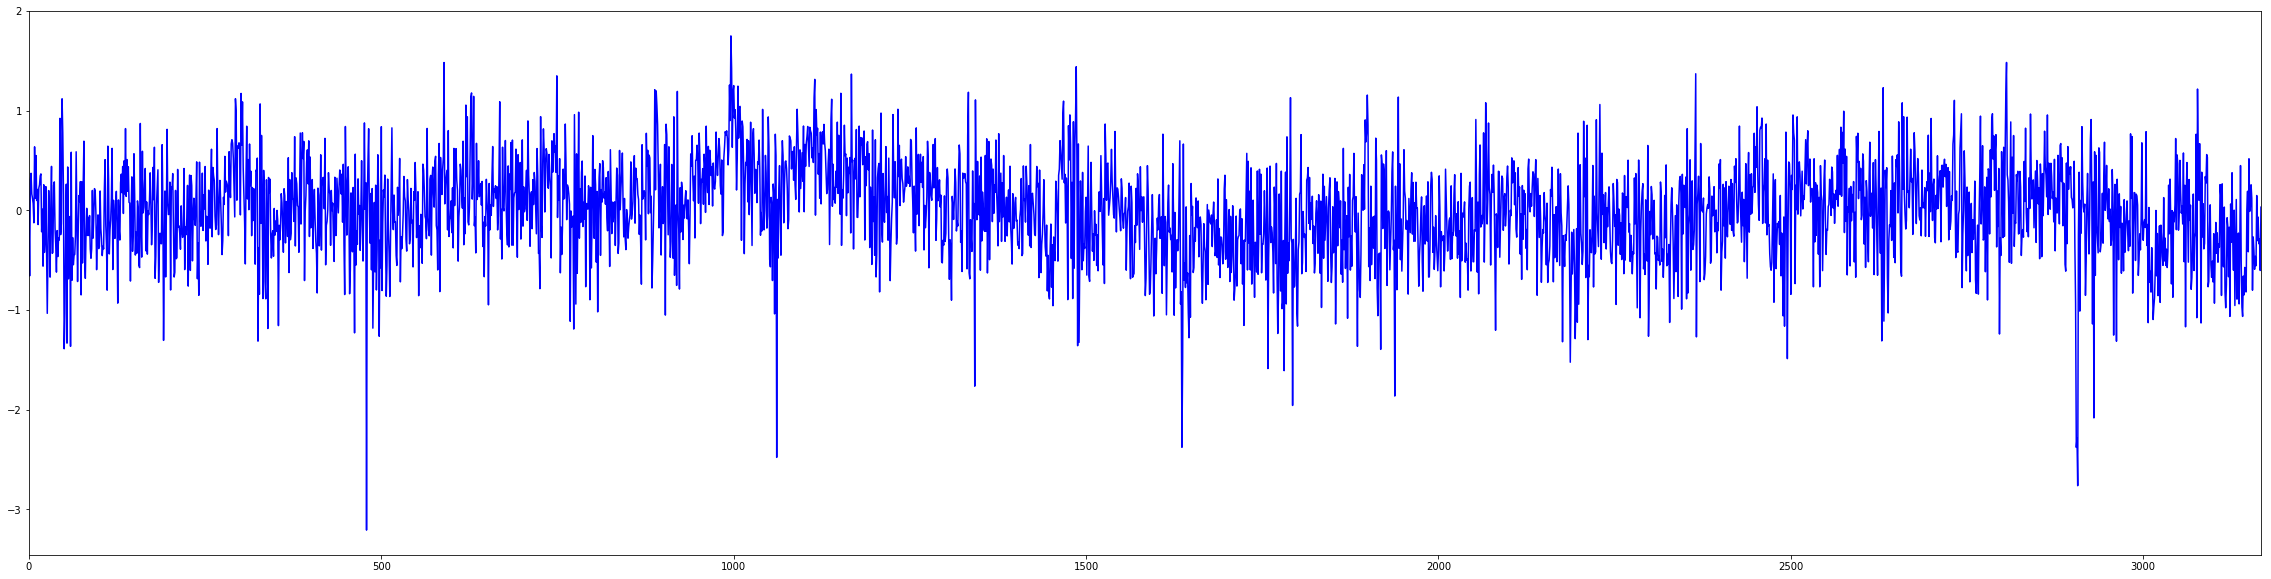

In [139]:
plt.figure(figsize=(40,10))
sbn.tsplot(noise, color="blue")